In [1]:
# Iris Dataset con pytorch

## Preparación de datos e primeiros import

In [2]:
import torch
from torch.utils.tensorboard import SummaryWriter
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
NVIDIA GeForce RTX 3060
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# irisDataset = pl.scan_csv("iris.data", has_header=False,with_column_names=lambda cols: ["sepallength","sepalwidth","petallength","petalwidth","class"])

irisDataset = pl.read_csv("iris.data", has_header=False,new_columns=["sepallength","sepalwidth","petallength","petalwidth","class"])

No csv non temos a fila de cabeceira, polo que lla engadimos nos a man

In [4]:
display(irisDataset)
tamanhoV1 = irisDataset.estimated_size()
print(f"Memoria usada: {tamanhoV1}")

sepallength,sepalwidth,petallength,petalwidth,class
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Iris-setosa"""
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""
…,…,…,…,…
6.3,2.5,5.0,1.9,"""Iris-virginica…"
6.5,3.0,5.2,2.0,"""Iris-virginica…"
6.2,3.4,5.4,2.3,"""Iris-virginica…"


Memoria usada: 8793


In [5]:
irisDataset.head()

sepallength,sepalwidth,petallength,petalwidth,class
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Iris-setosa"""
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""


In [6]:
irisDataset.describe()

statistic,sepallength,sepalwidth,petallength,petalwidth,class
str,f64,f64,f64,f64,str
"""count""",150.0,150.0,150.0,150.0,"""150"""
"""null_count""",1.0,1.0,1.0,1.0,"""1"""
"""mean""",5.843333,3.054,3.758667,1.198667,null
"""std""",0.828066,0.433594,1.76442,0.763161,null
"""min""",4.3,2.0,1.0,0.1,"""Iris-setosa"""
"""25%""",5.1,2.8,1.6,0.3,null
"""50%""",5.8,3.0,4.4,1.3,null
"""75%""",6.4,3.3,5.1,1.8,null
"""max""",7.9,4.4,6.9,2.5,"""Iris-virginica…"


In [7]:
irisDatasetv2 = pl.read_csv("iris.data", dtypes={
            "column_1": pl.Float32,
            "column_2": pl.Float32,
            "column_3": pl.Float32,
            "column_4": pl.Float32,
            "column_5": pl.String,
        },has_header=False,new_columns=["sepallength","sepalwidth","petallength","petalwidth","class"])
display(irisDatasetv2)
tamanhoV2 = irisDatasetv2.estimated_size()

print(f"Memoria usada: {tamanhoV2}, porcentaxe: {tamanhoV2/tamanhoV1 *100:2.2f}%")

sepallength,sepalwidth,petallength,petalwidth,class
f32,f32,f32,f32,str
5.1,3.5,1.4,0.2,"""Iris-setosa"""
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""
…,…,…,…,…
6.3,2.5,5.0,1.9,"""Iris-virginica…"
6.5,3.0,5.2,2.0,"""Iris-virginica…"
6.2,3.4,5.4,2.3,"""Iris-virginica…"


Memoria usada: 6377, porcentaxe: 72.52%


In [8]:
irisDatasetv3 = pl.read_csv("iris.data", dtypes={
            "column_1": pl.Float32,
            "column_2": pl.Float32,
            "column_3": pl.Float32,
            "column_4": pl.Float32,
            "column_5": pl.Categorical,
        },has_header=False,new_columns=["sepallength","sepalwidth","petallength","petalwidth","class"]).drop_nulls()
display(irisDatasetv3)
tamanhoV3 = irisDatasetv3.estimated_size()

print(f"Memoria usada: {tamanhoV3}, porcentaxe: {tamanhoV3/tamanhoV1 *100:2.2f}%")

sepallength,sepalwidth,petallength,petalwidth,class
f32,f32,f32,f32,cat
5.1,3.5,1.4,0.2,"""Iris-setosa"""
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""Iris-virginica…"
6.3,2.5,5.0,1.9,"""Iris-virginica…"
6.5,3.0,5.2,2.0,"""Iris-virginica…"


Memoria usada: 3196, porcentaxe: 36.35%


In [9]:

#X = irisDataset[irisDataset.columns.intersection(["sepallength","sepalwidth","petallength","petalwidth"])]
X = irisDatasetv3.select(
    pl.col("sepallength"),
    pl.col("sepalwidth"),
    pl.col("petallength"),
    pl.col("petalwidth"),
)
display(X)
#Y = irisDataset[irisDataset.columns.intersection(["class"])]
Y = irisDatasetv3.select(
    pl.col("class"),
)
nomeClases = Y["class"].unique()
display(nomeClases)

sepallength,sepalwidth,petallength,petalwidth
f32,f32,f32,f32
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
…,…,…,…
6.7,3.0,5.2,2.3
6.3,2.5,5.0,1.9
6.5,3.0,5.2,2.0


class
cat
"""Iris-setosa"""
"""Iris-versicolo…"
"""Iris-virginica…"


# Visualizacion

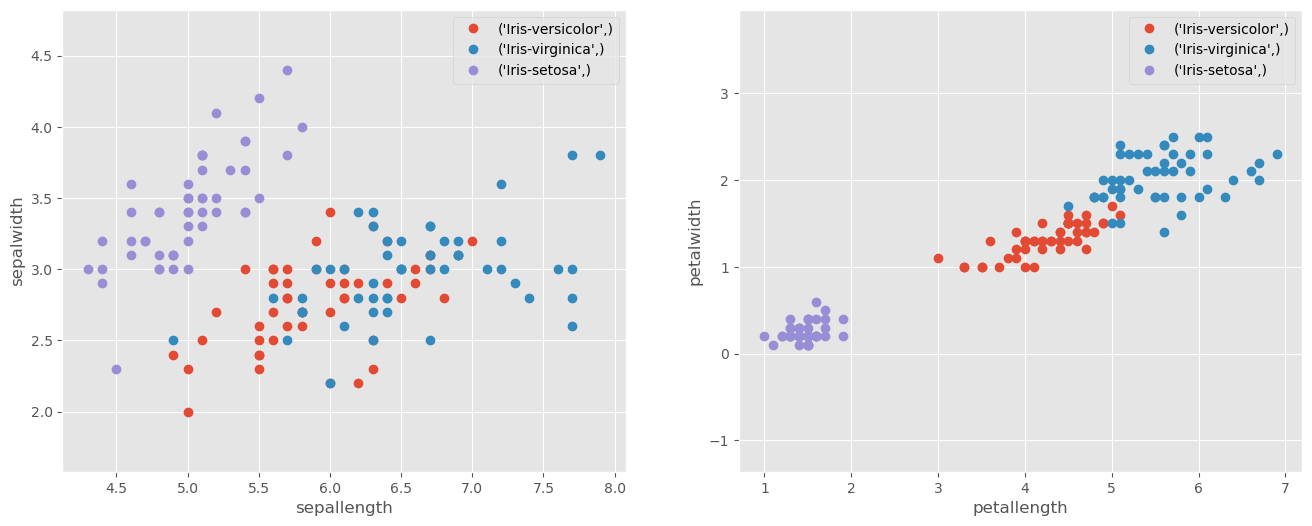

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for nomeClase, datos in irisDatasetv3.group_by(["class"]):
    # print(nomeClase)
    # print(datos)
    Xgrafica = datos.select(pl.col("sepallength"),)
    Ygrafica = datos.select(pl.col("sepalwidth"),)
    ax1.plot(Xgrafica, Ygrafica, 
             linestyle='none', 
             marker='o', 
             label=nomeClase)
    ax2.plot(
                datos.select(pl.col("petallength")),
                datos.select(pl.col("petalwidth")), 
                linestyle='none', 
                marker='o', 
                label=nomeClase)
ax1.set_xlabel("sepallength")
ax1.set_ylabel("sepalwidth")
ax1.axis('equal')
ax1.legend()


ax2.set_xlabel("petallength")
ax2.set_ylabel("petalwidth")
ax2.axis('equal')
ax2.legend()


Transformamos X para que os datos teñan de media 0 e desviación tipica 1

Para poder facer iso se precisa a media e desviación típica de cada columna:
- Pode ser un dato, moitos datasets dan esa información na documentación.
- Se pode ter que calcular

Como dato:

Summary Statistics:

|             |  Min  |  Max  |  Mean |  SD  | Class Correlation |
|:-----------:|:-----:|:-----:|:--------:|:--------:|:--------:|
|sepal length |  4.3  | 7.9  | 5.84 | 0.83  |  0.7826   
|sepal width | 2.0 | 4.4 |  3.05 | 0.43 |  -0.4194|
|petal length | 1.0 | 6.9 |  3.76 | 1.76 |   0.9490  (high!)
|petal width | 0.1 | 2.5 |  1.20 | 0.76 |   0.9565  (high!)

ou se pode obter do propio dataset:

In [11]:
medias = irisDatasetv3.mean()


medias_solo = torch.tensor(irisDatasetv3.select(pl.col(["sepallength","sepalwidth","petallength","petalwidth" ])).mean().to_numpy()).squeeze()
stds = irisDatasetv3.std()
stds_solo = torch.tensor(irisDatasetv3.select(pl.col(["sepallength","sepalwidth","petallength","petalwidth" ])).std().to_numpy()).squeeze()
display(medias)
display(medias_solo)
display(stds)
display(stds_solo)



sepallength,sepalwidth,petallength,petalwidth,class
f32,f32,f32,f32,cat
5.843333,3.054,3.758667,1.198667,null


tensor([5.8433, 3.0540, 3.7587, 1.1987])

sepallength,sepalwidth,petallength,petalwidth,class
f32,f32,f32,f32,cat
0.828066,0.433594,1.76442,0.763161,null


tensor([0.8281, 0.4336, 1.7644, 0.7632])

In [12]:
# import torch


class StandardScaler:

    def __init__(self, mean=None, std=None, epsilon=1e-7):
        """Standard Scaler.
        The class can be used to normalize PyTorch Tensors using native functions. The module does not expect the
        tensors to be of any specific shape; as long as the features are the last dimension in the tensor, the module
        will work fine.
        :param mean: The mean of the features. The property will be set after a call to fit.
        :param std: The standard deviation of the features. The property will be set after a call to fit.
        :param epsilon: Used to avoid a Division-By-Zero exception.
        """
        self.mean = mean
        self.std = std
        self.epsilon = epsilon

    def fit(self, values):
        dims = list(range(values.dim() - 1))
        self.mean = torch.mean(values, dim=dims)
        self.std = torch.std(values, dim=dims)
        

    def transform(self, values):
        return (values - self.mean) / (self.std + self.epsilon)

    def fit_transform(self, values):
        self.fit(values)
        return self.transform(values)

    def __call__(self, sample):
        values,saidas = sample
        return ((values - self.mean) / (self.std + self.epsilon), saidas)
        
    def __repr__(self):
        return f"mean: {self.mean}, std:{self.std}, epsilon:{self.epsilon}"

# torch_tensor = torch.tensor(XSinHead.values)
# scaler = StandardScaler()
# scaler.fit(torch_tensor)
# display(scaler)
# XScalada = scaler.fit_transform(torch_tensor)

E agora creamos unha instancia de standar scaler.



In [13]:
scaler = StandardScaler(medias_solo, stds_solo)
display(scaler)

mean: tensor([5.8433, 3.0540, 3.7587, 1.1987]), std:tensor([0.8281, 0.4336, 1.7644, 0.7632]), epsilon:1e-07

In [14]:
npSample = irisDatasetv3[0][["sepallength","sepalwidth","petallength","petalwidth" ]].to_numpy()
tSample = torch.Tensor(npSample)
display(tSample)
sample_escalado = scaler.transform(tSample)
display(sample_escalado)

tensor([[5.1000, 3.5000, 1.4000, 0.2000]])

tensor([[-0.8977,  1.0286, -1.3368, -1.3086]])

In [15]:
from torch.utils.data import Dataset

class IrisDataset(Dataset):
  def __init__(self, src_file, root_dir, transform=None):
    # data like: 5.0, 3.5, 1.3, 0.3, 0
    self.transform = transform
    self.dataSet = pl.scan_csv(src_file,  dtypes={
            "column_1": pl.Float32,
            "column_2": pl.Float32,
            "column_3": pl.Float32,
            "column_4": pl.Float32,
            "column_5": pl.Categorical,
        }, has_header=False).drop_nulls().rename({
            "column_1": "sepallength",
            "column_2": "sepalwidth",
            "column_3": "petallength",
            "column_4": "petalwidth",
            "column_5": "class",
        }).with_row_index("id")
    self.nomeClases = self.dataSet.select(pl.col("class")).unique().collect().get_column("class").to_list()
    display(self.nomeClases)

  def __len__(self):
    return self.dataSet.select(pl.len()).collect().item()

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    else:
      idx = [idx]
    seccion = self.dataSet.filter(pl.col("id").is_in(idx))
    datos = seccion.collect()
    preds = torch.tensor(datos.select(pl.col("sepallength"),pl.col("sepalwidth"),pl.col("petallength"),pl.col("petalwidth")).to_numpy()).squeeze()
    spcs = datos.select(pl.when(pl.col("class") == "Iris-setosa").then(0)
                        .when(pl.col("class") == "Iris-versicolor").then(1)
                        .when(pl.col("class") == "Iris-virginica").then(2).alias("clase")
                        ).cast(pl.Int64).get_column('clase').to_numpy()
    sample = (preds, torch.tensor(spcs).squeeze())
    if self.transform:
      sample = self.transform(sample)
    return sample

       

dataset = IrisDataset("iris.data",".",transform=scaler)
print(dataset[0])
print(dataset[torch.tensor([0,1])])


['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

(tensor([-0.8977,  1.0286, -1.3368, -1.3086]), tensor(0))
(tensor([[-0.8977,  1.0286, -1.3368, -1.3086],
        [-1.1392, -0.1245, -1.3368, -1.3086]]), tensor([0, 0]))


## Crease o conxunto de entrenamento e test

In [17]:
dataset = IrisDataset("iris.data",".",transform=scaler)

# # display(dataset.data)
from torch.utils.data import random_split


lonxitudeDataset = len(dataset)
print(f"Tamanho dataset {lonxitudeDataset}")
tamTrain =int(lonxitudeDataset*0.8)
tamVal = lonxitudeDataset - tamTrain
print(f"Tam dataset: {lonxitudeDataset} train: {tamTrain} tamVal: {tamVal}")
train_set, val_set = random_split(dataset,[tamTrain,tamVal])
train_ldr = torch.utils.data.DataLoader(train_set, batch_size=2,
    shuffle=True, drop_last=False)
validation_loader =torch.utils.data.DataLoader(val_set, batch_size=4, shuffle=False)    
# # for (batch_idx, batch) in enumerate(train_ldr):
# #     print("---------------------------")
# #     print("bat idx = " + str(batch_idx))
# #     print("predictors: ")
# #     print(batch['predictors'])
# #     print("species = " + str(batch['species']))


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Tamanho dataset 150
Tam dataset: 150 train: 120 tamVal: 30


## Creamos a NN

In [18]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x


model     = Model(4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
compiled_model = torch.compile(model)
model
compiled_model


OptimizedModule(
  (_orig_mod): Model(
    (layer1): Linear(in_features=4, out_features=50, bias=True)
    (layer2): Linear(in_features=50, out_features=50, bias=True)
    (layer3): Linear(in_features=50, out_features=3, bias=True)
  )
)

In [19]:
entradaProba,dest = next(iter(train_ldr))
print(entradaProba.dtype)
print(model.layer1.weight.dtype)
display(entradaProba)
saida = model(entradaProba)
display(dest)
display(saida)
display(loss_fn(saida, dest ))

torch.float32
torch.float32


tensor([[-1.2600, -0.1245, -1.3368, -1.1776],
        [ 2.1214, -0.1245,  1.6103,  1.1811]])

tensor([0, 2])

tensor([[-0.1101, -0.2268,  0.1794],
        [-0.0468, -0.1335,  0.1931]], grad_fn=<AddmmBackward0>)

tensor(1.0453, grad_fn=<NllLossBackward0>)

## Entrenamos

In [20]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(train_ldr) instead of
    # iter(train_ldr) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_ldr):
        # Every data instance is an input + label pair
        inputs, labels = data
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = compiled_model(inputs)
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()

        tb_writer.add_scalar('Loss/train', last_loss, epoch_index)

        if i % 10 == 9:
            last_loss = running_loss / 10 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_ldr) + i + 1
            
            running_loss = 0.
    return last_loss

In [21]:
from datetime import datetime

tb = SummaryWriter()
# PyTorch TensorBoard support
# from torch.utils.tensorboard import SummaryWriter
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 2

best_vloss = 1_000_000.
loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    compiled_model.train(True)
    avg_loss = train_one_epoch(epoch, tb)
    loss_list[epoch] = avg_loss
    
    # We don't need gradients on to do reporting
    compiled_model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        print(f"Entrada {vinputs}")
        voutputs = compiled_model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        print(torch.argmax(voutputs, dim=1))
        print(vlabels)
        correct = (torch.argmax(voutputs, dim=1) == vlabels).type(torch.FloatTensor)
        accuracy_list[epoch] += correct.sum()
        running_vloss += vloss
        tb.add_scalar("Loss/testing", avg_loss, epoch)

        
    tb.add_scalar("Correct", accuracy_list[epoch], epoch)
    tb.add_scalar("Accuracy", accuracy_list[epoch]/ len(train_set), epoch)

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {} {}/{}'.format(avg_loss, avg_vloss,accuracy_list[epoch],int(lonxitudeDataset*0.2)))

EPOCH 1:
  batch 10 loss: 1.0731125950813294
  batch 20 loss: 0.9187537550926208
  batch 30 loss: 0.9773034989833832
  batch 40 loss: 0.8618944108486175
  batch 50 loss: 0.812781286239624
  batch 60 loss: 0.6477976322174073
Entrada tensor([[ 1.0345,  0.1061,  0.5335,  0.3948],
        [ 0.4307, -1.9696,  0.4202,  0.3948],
        [ 0.3100, -0.1245,  0.4768,  0.2638],
        [-0.8977,  0.5674, -1.1668, -0.9155]])
tensor([2, 2, 2, 0])
tensor([1, 1, 1, 0])
Entrada tensor([[ 0.1892, -0.3552,  0.4202,  0.3948],
        [ 2.2422, -0.5858,  1.6670,  1.0500],
        [-0.5354, -0.1245,  0.4202,  0.3948],
        [-0.7769,  2.4124, -1.2801, -1.4396]])
tensor([2, 2, 2, 0])
tensor([1, 2, 1, 0])
Entrada tensor([[-0.1731,  3.1043, -1.2801, -1.0465],
        [-1.2600, -0.1245, -1.3368, -1.4396],
        [-0.5354,  1.4899, -1.2801, -1.3086],
        [-0.1731, -1.2777,  0.7035,  1.0500]])
tensor([0, 0, 0, 2])
tensor([0, 0, 0, 2])
Entrada tensor([[-0.4146, -1.7390,  0.1368,  0.1328],
        [-0.5354,

Text(0.5, 0, 'epochs')

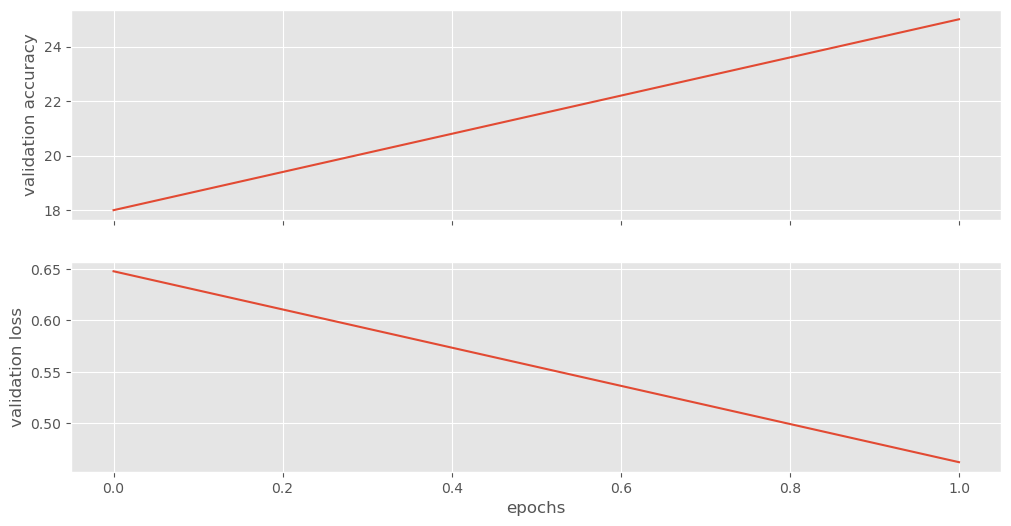

In [22]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")


## ROC Curve

In [23]:
from torchmetrics.classification import MulticlassROC, MulticlassAUROC
from torchmetrics.functional.classification import multiclass_auroc

fig = plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')


compiled_model.train(False)

roc = MulticlassROC(num_classes=3,thresholds=None)
auroc = MulticlassAUROC(num_classes=3,average = None)
with torch.no_grad():
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = compiled_model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        a, predicted = voutputs.max(1)

        labels = vlabels
        roc(voutputs, labels)
        auroc(voutputs, labels)


fpr, tpr, thresholds = roc.compute()
roc_auc = auroc.compute()
for i,nome in enumerate(dataset.nomeClases):
    plt.plot(fpr[i], tpr[i], label='{}, AUC = {:.3f}'.format(nome, roc_auc[i]))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
tb.add_figure("ROC", fig)

/home/isaac/Programas/miniconda3/envs/iris-dataset/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


In [24]:
from torchmetrics.classification import MulticlassConfusionMatrix
model.train(False)

confusion = MulticlassConfusionMatrix(num_classes=3)
with torch.no_grad():
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        
        vloss = loss_fn(voutputs, vlabels)
        a, predicted = voutputs.max(1)

        labels = vlabels
        confusion(predicted, labels)
matrix = confusion.compute()
display(matrix.tolist())
df_cm = pl.DataFrame(matrix.tolist(), schema=dataset.nomeClases, orient="col")
# df_cm = pd.DataFrame(matrix, index = [i for i in dataset.nomeClases],
#                      columns = [i for i in dataset.nomeClases])

[[12, 0, 0], [0, 7, 5], [0, 0, 6]]

In [26]:
display(df_cm)

Iris-setosa,Iris-versicolor,Iris-virginica
i64,i64,i64
12,0,0
0,7,0
0,5,6


In [25]:
import seaborn as sn
# plt.figure(figsize = (12,7))
seaborn_heatmap = sn.heatmap(df_cm, annot=True)
# plt.savefig('output.png')

confusion_seaborn = seaborn_heatmap.get_figure()
tb.add_figure("Confusion matrix", confusion_seaborn)

In [ ]:
# import tqdm

# EPOCHS  = 100
# X_train = Variable(X_train).float()
# y_train = Variable(torch.from_numpy(y_train)).long()
# X_test  = Variable(torch.from_numpy(X_test)).float()
# y_test  = Variable(torch.from_numpy(y_test)).long()

# loss_list     = np.zeros((EPOCHS,))
# accuracy_list = np.zeros((EPOCHS,))

# for epoch in tqdm.trange(EPOCHS):
#     y_pred = model(X_train)
#     loss = loss_fn(y_pred, y_train)
#     loss_list[epoch] = loss.item()
    
#     # Zero gradients
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     with torch.no_grad():
#         y_pred = model(X_test)
#         correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
#         accuracy_list[epoch] = correct.mean()
